In [1]:
#Feature reduce - Option 1: corr with Product_RON_loss

In [2]:
import pandas as pd
import numpy as np

In [3]:
table_path = "../data/data_num_325_fea_reduce.csv"
PCA_table_path = "../data/data_num_325_fea_PCA.csv"
data = pd.read_csv(table_path, index_col = 0)

X = data.drop("Product_RON_loss", 1)
y = data["Product_RON_loss"]

In [4]:
#Feature Scaling - Mean to 0, variance to 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
print(X.shape)

(325, 165)


In [5]:
#Feature Normalizing - Value to 0~1
#from sklearn.preprocessing import Normalizer

#归一化，返回值为归一化后的数据
#X = pd.DataFrame(Normalizer().fit_transform(X), columns = X.columns)
#print(X.shape)

In [6]:
#Feature reduce - Option 2: PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)         # 得到的PCA结果，第1列(不是第一个list）是PC1...第N列是PCN。 
print(X_pca)

[[-7.38575216e+00  9.12567850e-01 -5.07593846e+00 ... -2.63944155e-02
  -1.09346564e-01  3.15214475e-02]
 [-7.33215745e+00  8.15717069e-01 -5.68669075e+00 ...  2.69008799e-02
   2.91324752e-02 -4.32520103e-03]
 [-6.98190601e+00  1.86996054e+00 -5.73450973e+00 ...  1.82763763e-02
   6.46482743e-02 -5.06976664e-04]
 ...
 [ 6.69224582e+00 -5.09860870e+00 -2.04008135e+00 ...  3.95670659e-02
  -1.76876683e-02  1.72731759e-02]
 [ 5.67098881e+00 -4.50603706e+00 -1.48003568e+00 ...  8.00788581e-02
   3.12226281e-02 -2.24278760e-02]
 [ 6.48386924e+00 -6.82393576e+00 -3.11983283e+00 ...  1.48207428e-02
  -1.33997856e-02  5.51990955e-02]]


In [7]:
# 特征向量/PC
X_cov = pca.get_covariance() 
print(X_cov)
print(X_cov.shape)


[[ 1.00308642  0.47610222 -0.44080085 ... -0.16261206 -0.37168226
   0.43164993]
 [ 0.47610222  1.00308642 -0.42497573 ... -0.04938696 -0.21676287
   0.17700446]
 [-0.44080085 -0.42497573  1.00308642 ...  0.07938598  0.10606231
  -0.17866152]
 ...
 [-0.16261206 -0.04938696  0.07938598 ...  1.00308642  0.14909876
  -0.19966264]
 [-0.37168226 -0.21676287  0.10606231 ...  0.14909876  1.00308642
  -0.57210086]
 [ 0.43164993  0.17700446 -0.17866152 ... -0.19966264 -0.57210086
   1.00308642]]
(165, 165)


In [8]:
# 各个主成分的贡献率
exp_var_ratio = pca.explained_variance_ratio_         # 特征根由`pca.explained_variance_` 得到。
print( exp_var_ratio)
print(len(exp_var_ratio))
print(pd.DataFrame(pca.components_,columns=X.columns))

[2.25369297e-01 1.03091046e-01 7.31960536e-02 5.92914727e-02
 4.94681440e-02 3.77912185e-02 3.29568387e-02 2.52522485e-02
 2.45069388e-02 2.31983032e-02 1.86716407e-02 1.72632371e-02
 1.56444720e-02 1.39431887e-02 1.25147804e-02 1.20076382e-02
 1.07650788e-02 9.47365505e-03 9.10104155e-03 8.72960883e-03
 8.27449608e-03 7.98693639e-03 7.79229698e-03 7.03551046e-03
 6.50425205e-03 6.38552835e-03 6.19578490e-03 6.07697959e-03
 5.66447330e-03 5.42861095e-03 5.34840044e-03 5.14323008e-03
 4.91357893e-03 4.82321967e-03 4.69356593e-03 4.23939037e-03
 4.11376411e-03 3.97772918e-03 3.86314925e-03 3.64685690e-03
 3.58812584e-03 3.42833160e-03 3.32854462e-03 3.27034745e-03
 3.19169361e-03 3.06553697e-03 2.91402616e-03 2.77279695e-03
 2.62057310e-03 2.58234058e-03 2.48417185e-03 2.46692229e-03
 2.32644001e-03 2.20146189e-03 2.15960890e-03 2.12279508e-03
 2.05669137e-03 2.00784702e-03 1.92134448e-03 1.88426361e-03
 1.83726788e-03 1.76253298e-03 1.68076946e-03 1.65809115e-03
 1.57807917e-03 1.552073

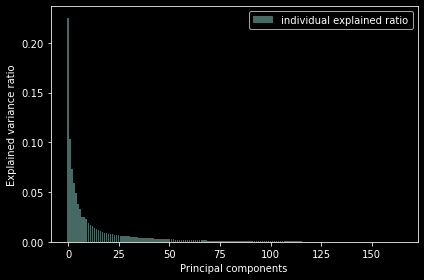

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(exp_var_ratio)), exp_var_ratio, alpha=0.5, label='individual explained ratio')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

Text(0, 0.5, 'cumulative explained variance')

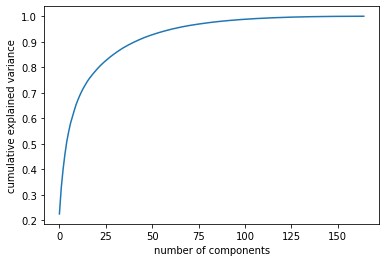

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# We need 30 components to get 90% variance!

In [11]:
pca = PCA(n_components=30,whiten=True)
pca = pca.fit(X)
XPCA = pd.DataFrame(pca.transform(X))
XPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.209306,0.220924,-1.458349,1.179616,-0.046790,0.292115,-0.546291,1.529350,-1.923184,-0.392947,...,0.402728,0.130559,0.580558,-0.416146,-0.010217,0.927747,0.514159,0.696201,0.151822,1.138855
1,-1.200531,0.197478,-1.633822,1.201225,-0.010363,1.211789,-0.944053,1.166638,-1.006230,-1.451329,...,-0.652109,-0.622899,0.014895,0.072285,0.633631,-0.261286,0.092281,0.137171,-0.557037,2.427385
2,-1.143182,0.452700,-1.647560,0.681334,0.010004,0.821975,-0.708476,1.721302,-0.770135,-0.655932,...,-0.202472,-1.684115,0.622157,0.525184,0.890722,-0.332297,-0.464407,0.621386,-0.143462,2.159890
3,-1.013641,0.495940,-1.479503,0.644685,-0.044250,0.786018,-1.241329,1.477313,-0.908549,-0.443674,...,-0.653543,-1.176584,0.554197,-0.657673,0.146428,-0.332493,0.928775,0.013513,0.331857,1.476936
4,-1.039881,0.424173,-1.491844,0.313787,0.377812,0.555669,-0.588630,1.677836,-1.619710,0.248962,...,-0.724364,0.034889,-0.089749,0.068742,-0.113715,1.205032,0.577692,0.354233,-0.468326,1.200367


In [12]:
X_cov = pca.get_covariance()
print(X_cov)

[[ 11.71402836   6.44947017 -10.77902256 ...  -8.29451369  -8.01970638
    9.67959377]
 [  6.44947017   5.5754169   -5.7391077  ...  -3.4618018   -4.0348018
    4.61763086]
 [-10.77902256  -5.7391077   16.40878695 ...   7.719338     6.98526272
   -8.94509023]
 ...
 [ -8.29451369  -3.4618018    7.719338   ...  13.59806108   5.83274347
   -6.82211036]
 [ -8.01970638  -4.0348018    6.98526272 ...   5.83274347   8.66018868
   -8.34635563]
 [  9.67959377   4.61763086  -8.94509023 ...  -6.82211036  -8.34635563
   12.51708506]]


[0.2253693  0.10309105 0.07319605 0.05929147 0.04946814 0.03779122
 0.03295684 0.02525225 0.02450694 0.0231983  0.01867164 0.01726324
 0.01564447 0.01394319 0.01251478 0.01200764 0.01076508 0.00947366
 0.00910104 0.00872961 0.0082745  0.00798694 0.0077923  0.00703551
 0.00650425 0.00638553 0.00619578 0.00607698 0.00566447 0.00542861]


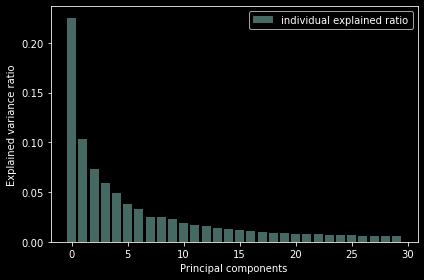

In [13]:
# 各个主成分的贡献率
exp_var_ratio = pca.explained_variance_ratio_         # 特征根由`pca.explained_variance_` 得到。

print( exp_var_ratio)                                 # = 特征根/(∑特征根)，由大到小排列


import matplotlib.pyplot as plt    # 把PC贡献率可视化
%matplotlib inline
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(exp_var_ratio)), exp_var_ratio, alpha=0.5, label='individual explained ratio')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [14]:
XPCA["Product_RON_loss"] = y
XPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Product_RON_loss
0,-1.209306,0.220924,-1.458349,1.179616,-0.046790,0.292115,-0.546291,1.529350,-1.923184,-0.392947,...,0.130559,0.580558,-0.416146,-0.010217,0.927747,0.514159,0.696201,0.151822,1.138855,1.38
1,-1.200531,0.197478,-1.633822,1.201225,-0.010363,1.211789,-0.944053,1.166638,-1.006230,-1.451329,...,-0.622899,0.014895,0.072285,0.633631,-0.261286,0.092281,0.137171,-0.557037,2.427385,1.18
2,-1.143182,0.452700,-1.647560,0.681334,0.010004,0.821975,-0.708476,1.721302,-0.770135,-0.655932,...,-1.684115,0.622157,0.525184,0.890722,-0.332297,-0.464407,0.621386,-0.143462,2.159890,1.38
3,-1.013641,0.495940,-1.479503,0.644685,-0.044250,0.786018,-1.241329,1.477313,-0.908549,-0.443674,...,-1.176584,0.554197,-0.657673,0.146428,-0.332493,0.928775,0.013513,0.331857,1.476936,1.38
4,-1.039881,0.424173,-1.491844,0.313787,0.377812,0.555669,-0.588630,1.677836,-1.619710,0.248962,...,0.034889,-0.089749,0.068742,-0.113715,1.205032,0.577692,0.354233,-0.468326,1.200367,1.28


In [15]:
XPCA.to_csv(PCA_table_path)
print("save reduced features to", PCA_table_path)

save reduced features to ../data/data_num_325_fea_PCA.csv
